# 0.0 IMPORTS

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import inflection

from IPython.display       import Image
from IPython.core.display  import HTML

warnings.filterwarnings( 'ignore' )

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [3]:
df_raw = pd.read_csv('data/churn.csv', low_memory=False)

# 1.0 DATA DESCRIPTION

In [4]:
df1 = df_raw.copy()
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 1.1. Rename Columns

In [5]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
old_cols = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Country',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']

snakecase = lambda x: inflection.underscore(x)
new_cols = list(map( snakecase , old_cols))

# rename columns
df1.columns = new_cols

In [7]:
df1.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'country',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

## 1.2. Data Dimension

In [8]:
print(f'Total of rows: {df1.shape[0]}')
print(f'Total of columns: {df1.shape[1]}')

Total of rows: 10000
Total of columns: 14


## 1.3. Data Types

In [9]:
df1.dtypes

row_number            int64
customer_id           int64
surname              object
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

## 1.4. Check N/A

In [10]:
df1.isnull().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

## 1.5. Fillout N/A

 - Theres is no N/A values.

## 1.6. Change Types

In [11]:
new_map = {1: 'yes',
           0: 'no'}

df1['has_cr_card'] = df1['has_cr_card'].map( new_map )
df1['is_active_member'] = df1['is_active_member'].map( new_map )
df1['exited'] = df1['exited'].map( new_map )

In [12]:
df1.dtypes

row_number            int64
customer_id           int64
surname              object
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card          object
is_active_member     object
estimated_salary    float64
exited               object
dtype: object

## 1.7. Descriptive Statistics

In [13]:
num_attrs = df1.select_dtypes( include = ['int64', 'float64'] )
cat_attrs = df1.select_dtypes( exclude = ['int64', 'float64'] )

### 1.7.1 Numerical Attributes

In [14]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attrs.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attrs.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attrs.apply( np.std ) ).T
d2 = pd.DataFrame( num_attrs.apply( min ) ).T
d3 = pd.DataFrame( num_attrs.apply( max ) ).T
d4 = pd.DataFrame( num_attrs.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attrs.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attrs.apply( lambda x: x.kurtosis() ) ).T

# Concatenate
ds = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
ds.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
ds


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,row_number,1.00,10000.00,9999.00,5.000500e+03,5.000500e+03,2886.751332,0.000000,-1.200000
1,customer_id,15565701.00,15815690.00,249989.00,1.569094e+07,1.569074e+07,71932.589224,0.001149,-1.196113
2,credit_score,350.00,850.00,500.00,6.505288e+02,6.520000e+02,96.648466,-0.071607,-0.425726
3,age,18.00,92.00,74.00,3.892180e+01,3.700000e+01,10.487282,1.011320,1.395347
4,tenure,0.00,10.00,10.00,5.012800e+00,5.000000e+00,2.892030,0.010991,-1.165225
5,balance,0.00,250898.09,250898.09,7.648589e+04,9.719854e+04,62394.285254,-0.141109,-1.489412
6,num_of_products,1.00,4.00,3.00,1.530200e+00,1.000000e+00,0.581625,0.745568,0.582981
7,estimated_salary,11.58,199992.48,199980.90,1.000902e+05,1.001939e+05,57507.617221,0.002085,-1.181518


### 1.7.2 Categorical Attributes

In [15]:
cat_attrs.apply( lambda x: x.unique().shape[0] )

surname             2932
country                3
gender                 2
has_cr_card            2
is_active_member       2
exited                 2
dtype: int64

In [16]:
cat_attrs['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [17]:
cat_attrs['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [18]:
cat_attrs['has_cr_card'].value_counts()

yes    7055
no     2945
Name: has_cr_card, dtype: int64

In [19]:
cat_attrs['is_active_member'].value_counts()

yes    5151
no     4849
Name: is_active_member, dtype: int64

In [20]:
cat_attrs['exited'].value_counts()

no     7963
yes    2037
Name: exited, dtype: int64

## 1.7.3. Inconsistent Variables

In [22]:
df1.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'country',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [23]:
inc_data = {
        'row_number': "will drop because it's not important", 
        'customer_id': "will drop because it's an unique ID",
        'estimated_salary': "It seems there's an inconsistence on the min estimated salary.",
        'age': 'range of age is 18 and 92. Ok', 
        'exited': 'Apparently is fine',
        'surname': 'Ok', 
        'credit_score': 'Ok', 
        'country': 'Ok',
        'gender': 'Ok', 
        'tenure': 'Ok', 
        'balance': 'Ok', 
        'num_of_products': 'Ok', 
        'has_cr_card': 'Ok',
        'is_active_member': 'Ok' 
}

In [24]:
pd.Series( inc_data )

row_number                       will drop because it's not important
customer_id                       will drop because it's an unique ID
estimated_salary    It seems there's an inconsistence on the min e...
age                                     range of age is 18 and 92. Ok
exited                                             Apparently is fine
surname                                                            Ok
credit_score                                                       Ok
country                                                            Ok
gender                                                             Ok
tenure                                                             Ok
balance                                                            Ok
num_of_products                                                    Ok
has_cr_card                                                        Ok
is_active_member                                                   Ok
dtype: object

# 2.0 FEATURE ENGINEERING

In [25]:
df2 = df1.copy()

## 2.1. Mind Map Hypotheses

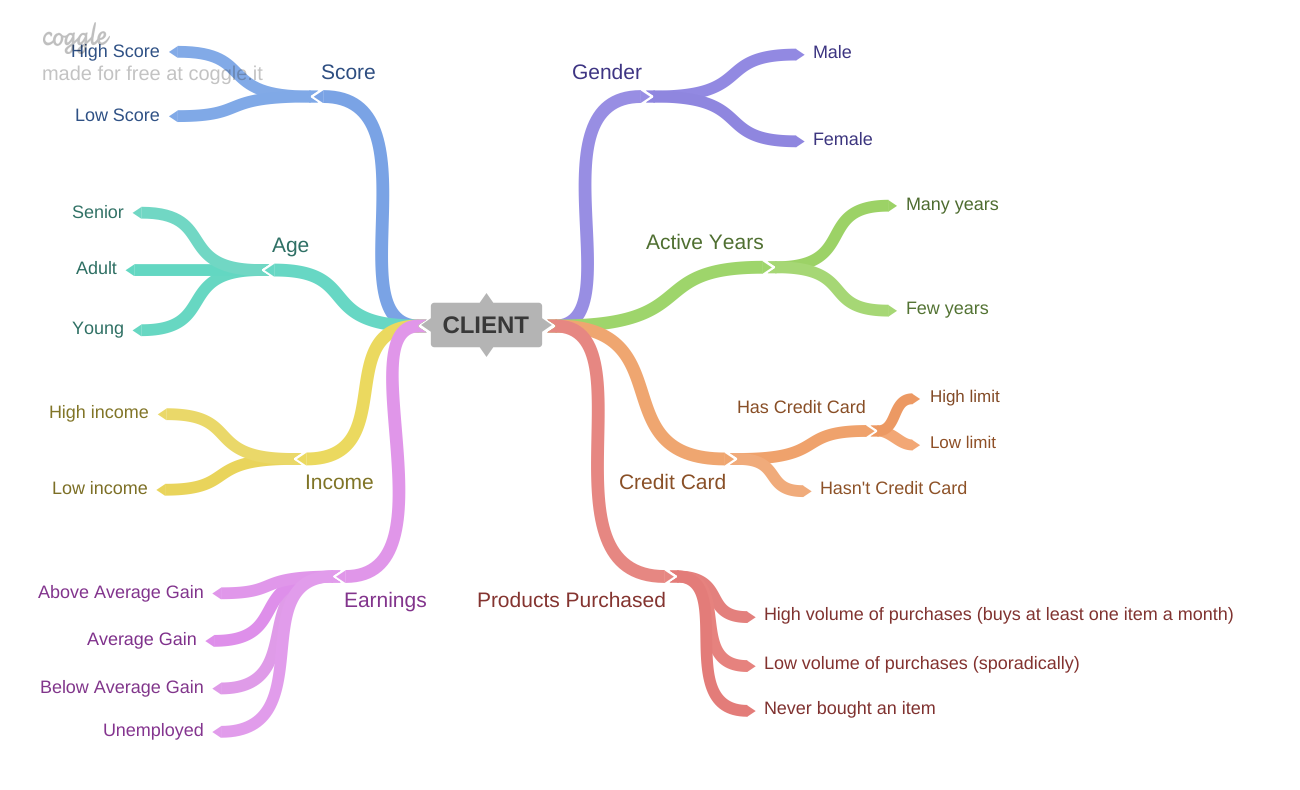

In [26]:
Image( 'img/mind_map.png' )

## 2.2. Create Hypotheses List

## 2.3. Priority Hypotheses